In [14]:
from matplotlib import pyplot as plt

# (attack_mode, attack_type): (config, checkpoint)
str_dict={
    ('untargeted', 'remove'): ('untar_remove0712', 'UR0712'),
    ('targeted', 'remove'): ('tar_remove0712', 'TR0712'),
    ('untargeted', 'misclassify'): ('untar_misclassify0712', 'UM0712'),
    ('targeted', 'misclassify'): ('tar_misclassify0712', 'TM0712'),
    ('untargeted', 'generate'): ('untar_generate0712', 'UG0712'),
}

In [15]:
def image_demo(attack_type, attack_mode, victim_idx=None, target_idx=None):
    config, checkpoint = str_dict[(attack_mode, attack_type)]
    DEMO = '/home/jialin/mmdetection/mmdet/AnywhereDoor/demo/image_demo.py'
    CFG=f'/home/jialin/mmdetection/configs/_mycfg/faster_rcnn_voc/{config}.py'
    CK=f'/home/jialin/mmdetection/work_dirs/faster_rcnn_voc/Aug240-Full/{checkpoint}/checkpoints/epoch_12.pth'
    TG=f'/home/jialin/mmdetection/work_dirs/faster_rcnn_voc/Aug240-Full/{checkpoint}/checkpoints/trigger_epoch_12.pth'
    INPUT_DIR='./inputs'
    OUTPUT_DIR='./outputs'

    out_dir1 = f'{OUTPUT_DIR}/{checkpoint}Clean'
    out_dir2 = f'{OUTPUT_DIR}/{checkpoint}Dirty'
    !rm -r $out_dir1
    !rm -r $out_dir2

    # clean outputs
    input_file = f'{INPUT_DIR}/0.jpg'
    output_dir = f'{OUTPUT_DIR}/{checkpoint}Clean'
    !python $DEMO $input_file $CFG \
        --weight $CK --out-dir $output_dir

    # dirty outputs
    input_file = f'{INPUT_DIR}/0.jpg'
    output_dir = f'{OUTPUT_DIR}/{checkpoint}Dirty'
    command = f'python {DEMO} {input_file} {CFG} --weight {CK} --trigger {TG} --attack-type {attack_type} --attack-mode {attack_mode} --out-dir {output_dir}'
    if target_idx is not None:
        command += f' --target-idx {target_idx}'
    if victim_idx is not None:
        command += f' --victim-idx {victim_idx}'
    !{command}
    
    clean_img = plt.imread(f'./outputs/{checkpoint}Clean/vis/0.jpg')
    dirty_img = plt.imread(f'./outputs/{checkpoint}Dirty/vis/0.jpg')

    fig, axes = plt.subplots(1, 2, figsize=(30, 12))
    axes[0].imshow(clean_img)
    axes[0].axis('off')
    axes[1].imshow(dirty_img)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

Loads checkpoint by local backend from path: /home/jialin/mmdetection/work_dirs/faster_rcnn_voc/Aug240-Full/UM0712/checkpoints/epoch_12.pth
08/27 20:14:32 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/home/jialin/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/home/jialin/mmengine/mmengine/visualization/visualizer.py:760: UserWarning: ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
  warnings.warn(
/home/jialin/mmengine/mmengine/visualization/visualizer.py:831: UserWarning: ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
  

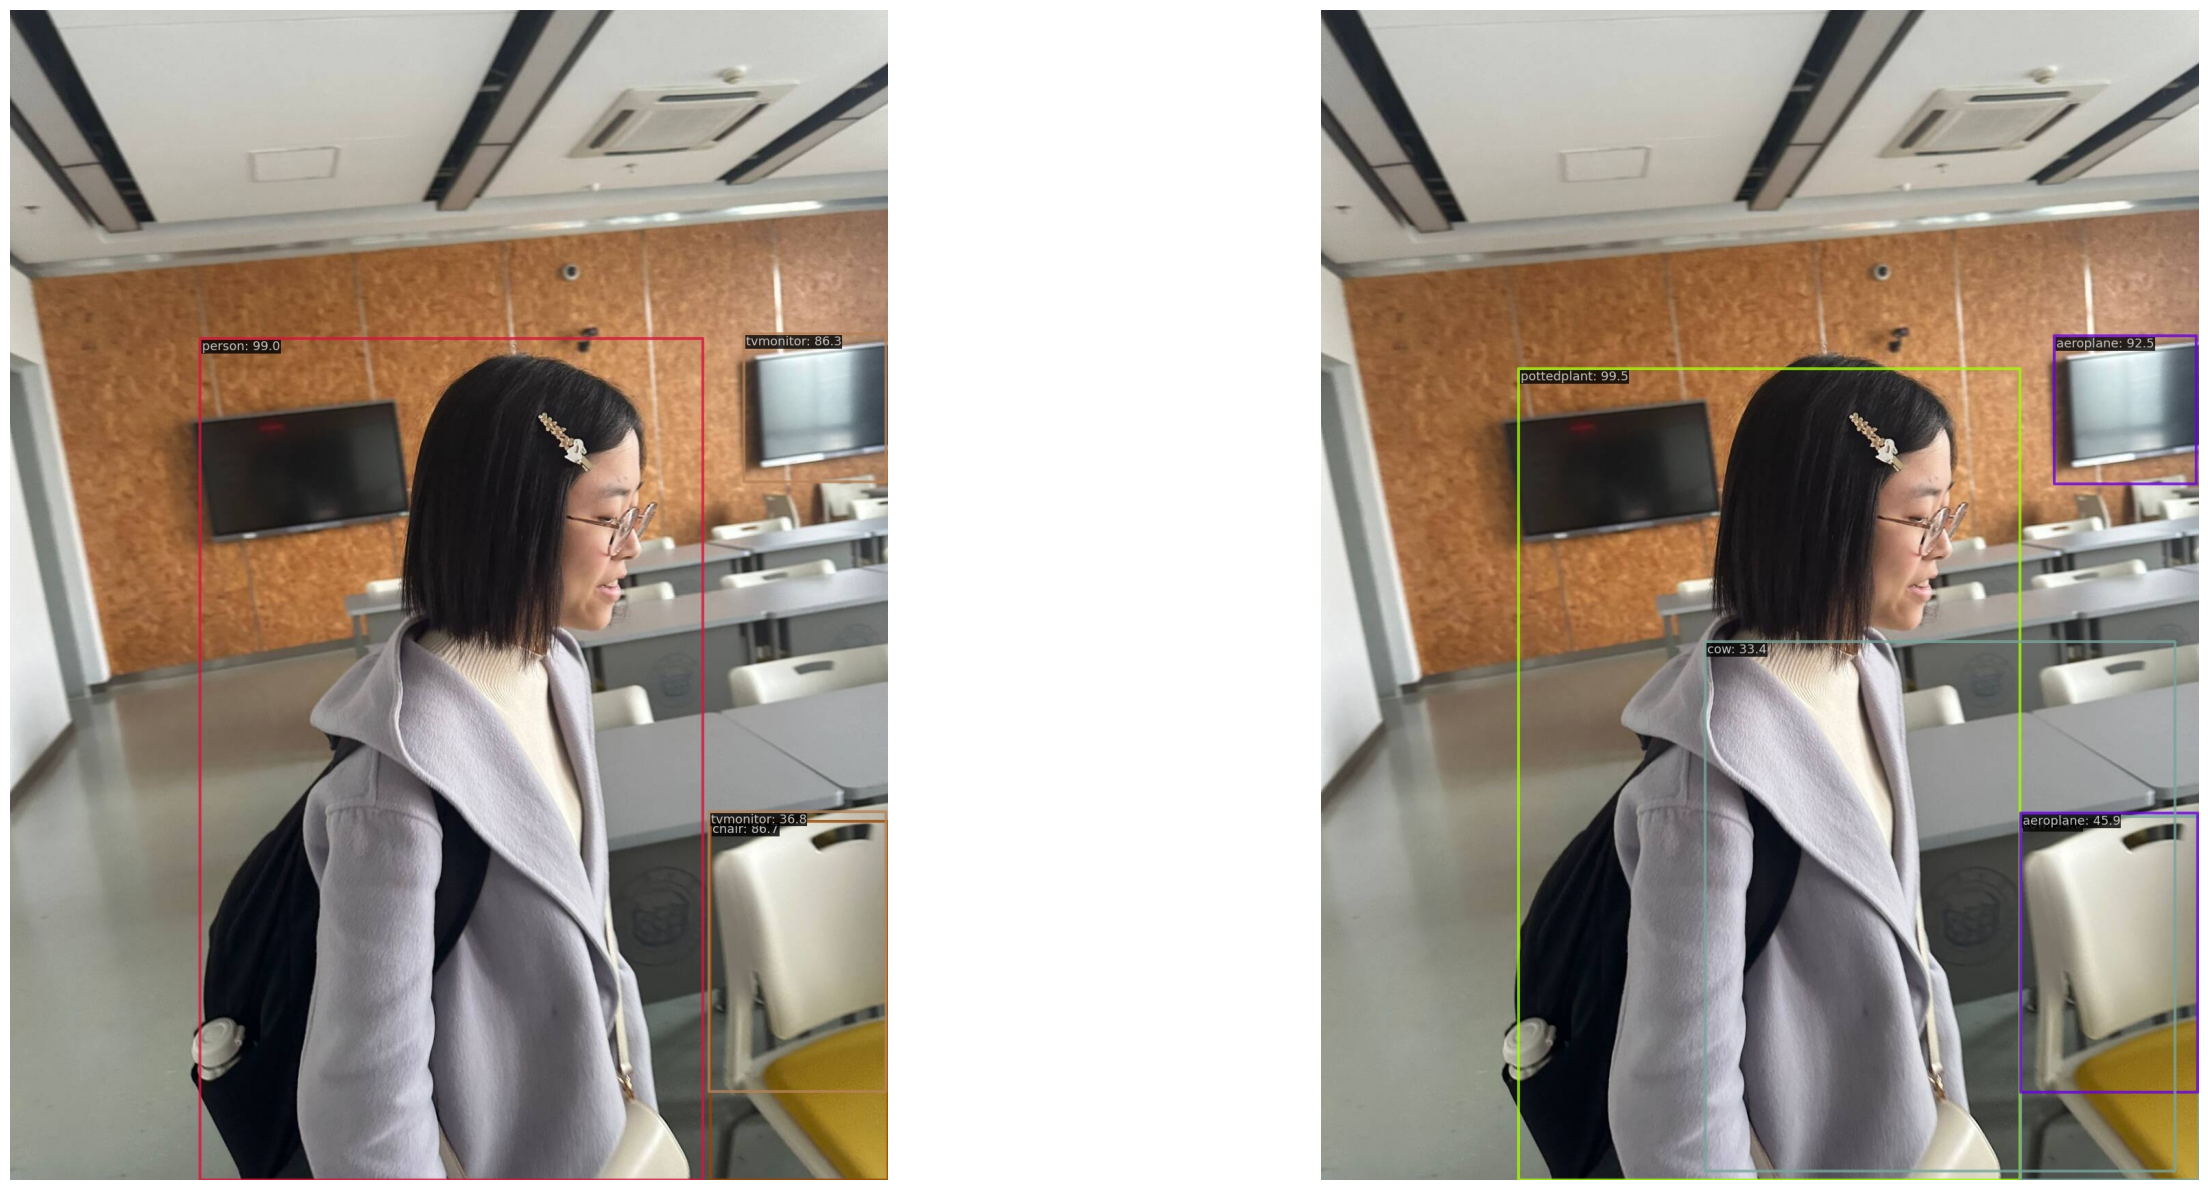

In [22]:
# image_demo('remove', 'untargeted')
# image_demo('misclassify', 'untargeted')
# image_demo('generate', 'untargeted')
# victim_idx=14
# image_demo('remove', 'targeted', victim_idx)
# victim_idx=1
# image_demo('remove', 'targeted', victim_idx)
# victim_idx=6
# image_demo('remove', 'targeted', victim_idx)
# victim_idx=14
# target_idx=6
# image_demo('misclassify', 'targeted', victim_idx, target_idx)
victim_idx=14
target_idx=7
image_demo('misclassify', 'untargeted', victim_idx, target_idx)